# Image classification

In [40]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random
import keras
import warnings 
warnings.filterwarnings('ignore')

### Reading Data

In [41]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# 10,000 images
# 50,000 samples---50,000 arrays each of 3 dimensions
# each sample is a 32 x 32 pixels image
# 3 --RGB channels

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### Visualizing Data

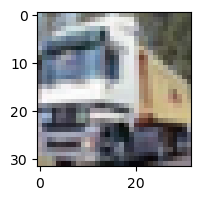

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])
plt.show()
#This function is used to display images or 2D arrays as a graphical representation.

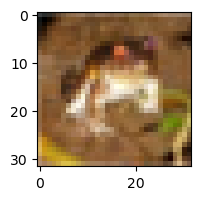

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])
plt.show()

In [8]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
y_train[9]

3

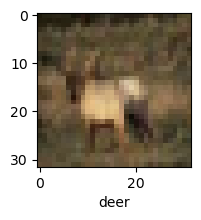

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])
plot_sample(X_train,y_train,3)

In [11]:
def get_ten_random_images():
    
    #function returns a dictionary of <label, idx> where idx is the random datapoint of class 'label'
    d = {}
    while len(d.keys()) < 10:
        idx = random.randint(0, len(y_train)-1)
        if y_train[idx] not in d.keys():
            d[y_train[idx]] = idx
    return d

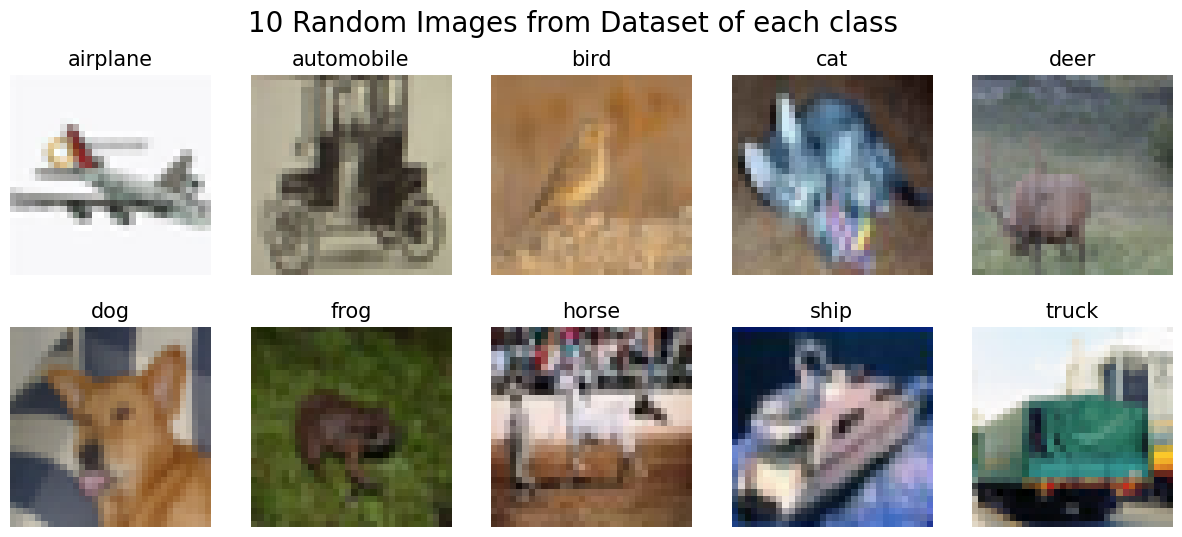

In [12]:
d = get_ten_random_images()
rows= 2
cols=5
fig,axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(classes[i-1], fontsize=15)
plt.suptitle("10 Random Images from Dataset of each class",fontsize = 20)
plt.show()

### Data Modelling

#### Normalize the data
- whenever you have an image, you want to divide each pixel value by 255.
- pixel value ranges from 0 to 255 for each of the channel.
- it will be normalized to be in between 0 and 1

In [13]:
X_train = X_train/255
X_test = X_test/255

### Model Training

### Building a ANN

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")])
ann.compile(optimizer='SGD',loss="sparse_categorical_crossentropy", metrics=["accuracy"])
ann.fit(X_train,y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.3018 - loss: 1.9341
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4196 - loss: 1.6434
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.4537 - loss: 1.5521
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.4751 - loss: 1.4972
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.4972 - loss: 1.4370


#### Accuracy is around 49% at the end of 5 epochs

In [15]:
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.61      0.54      1000
           1       0.67      0.56      0.61      1000
           2       0.26      0.61      0.37      1000
           3       0.33      0.46      0.38      1000
           4       0.48      0.21      0.30      1000
           5       0.50      0.23      0.32      1000
           6       0.56      0.44      0.49      1000
           7       0.67      0.41      0.51      1000
           8       0.64      0.56      0.60      1000
           9       0.58      0.57      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.47     10000
weighted avg       0.52      0.47      0.47     10000



## Building a CNN

In [38]:
type(X_train[1][2][3][2]), type(X_test[1][2][3][2])

(numpy.float32, numpy.float32)

In [37]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
## Mean shifting and variance centering
mean = np.mean(X_train, axis=(0,1,2,3))
std = np.std(X_train, axis = (0,1,2,3))

In [19]:
X_train = (X_train-mean)/(std + 1e-7)
X_test = (X_test-mean)/(std + 1e-7)

In [20]:
## Converting target variable into categorical matrix
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

In [21]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

#### Model Building

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import regularizers

In [44]:
weight_decay = 1e-4

In [24]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))



model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 617,685 (2.36 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 308,395 (1.18 MB)

In [46]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=lr_schedule),
    metrics=['accuracy']
)

In [27]:
epochs_hist = model.fit(X_train, y_train_cat, batch_size=64, epochs=50, validation_split=0.2, shuffle=True)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 185ms/step - accuracy: 0.3657 - loss: 2.3121 - val_accuracy: 0.5301 - val_loss: 1.5214
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.6238 - loss: 1.1821 - val_accuracy: 0.6942 - val_loss: 0.9832
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 165ms/step - accuracy: 0.6951 - loss: 0.9754 - val_accuracy: 0.6982 - val_loss: 0.9529
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - accuracy: 0.7306 - loss: 0.8575 - val_accuracy: 0.7534 - val_loss: 0.8286
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 161ms/step - accuracy: 0.7596 - loss: 0.7810 - val_accuracy: 0.7708 - val_loss: 0.7620
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 157ms/step - accuracy: 0.7896 - loss: 0.7140 - val_accuracy: 0.7837 - val_loss: 0.7245
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 155ms/step - accuracy: 0.7982 - loss: 0.6761 - val_accuracy: 0.7979 - val_loss: 0.7053
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 159ms/step - accuracy: 0.8199 - l

625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 153ms/step - accuracy: 0.9298 - loss: 0.3956 - val_accuracy: 0.8544 - val_loss: 0.7058


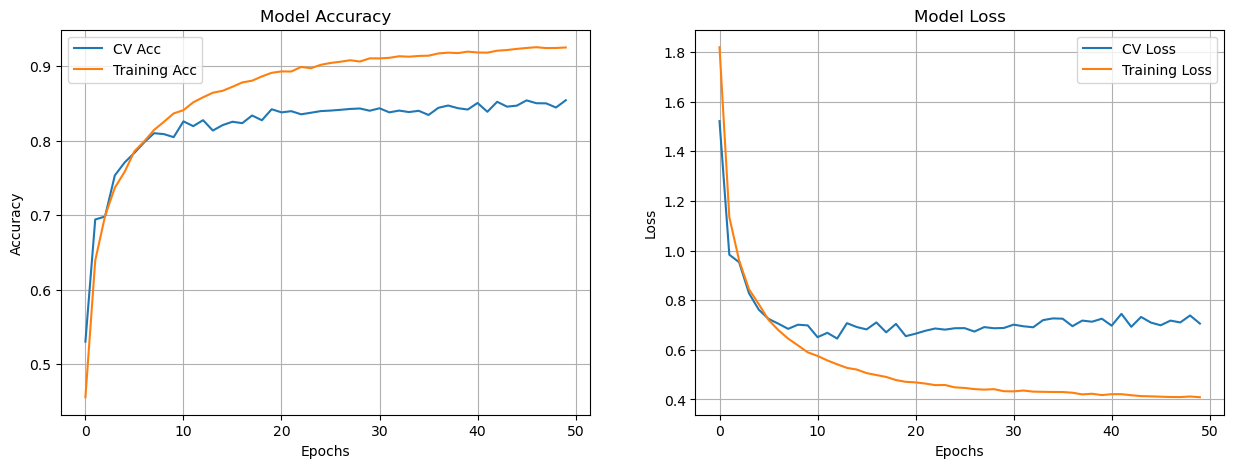

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

#### Model Predictions

In [48]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


array([[9.9184626e-01, 8.1537804e-03, 1.1394174e-19, ..., 9.0515140e-18,
        4.9239425e-19, 6.5580657e-13],
       [4.7428595e-05, 9.9995255e-01, 2.9605108e-34, ..., 0.0000000e+00,
        1.8865903e-16, 1.4527895e-27],
       [9.1950184e-01, 6.3212015e-02, 4.9492296e-15, ..., 7.9541678e-08,
        1.7285949e-02, 6.5655437e-09],
       ...,
       [3.0085498e-33, 0.0000000e+00, 3.8390695e-23, ..., 3.1455540e-35,
        0.0000000e+00, 0.0000000e+00],
       [2.7996984e-28, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2213712e-07, 9.9999988e-01, 2.8463138e-29, ..., 5.6334670e-08,
        3.2207483e-36, 7.2517070e-20]], dtype=float32)

In [49]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 1, 0, 1, 1]

In [50]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [32]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

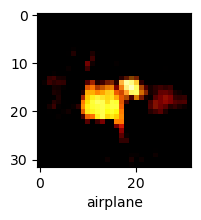

In [39]:
plot_sample(X_test, y_test,3)

#### Model Evaluation

In [34]:
#evaluating using test set
score = model.evaluate(X_test, y_test_cat, batch_size=128, verbose=1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8447 - loss: 0.7365


In [35]:
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

Accuracy on Test Set : 84.73%


With CNN, at the end 5 epochs, accuracy was at around **85%** which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

### Model Saving

In [52]:
model.save('image_classification_CNN.h5')